In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("data/df_arabica_clean.csv")



Colunas com valores faltantes (na).

In [3]:
nas = df.isna().sum()
nas[nas > 0]

Farm Name              2
Lot Number             1
Mill                   3
ICO Number           132
Altitude               1
Region                 2
Producer               1
Variety                6
Processing Method      5
dtype: int64

In [4]:
#mudando nomes pq o grafico ficava feio
df['Country of Origin'] = df['Country of Origin'].replace({
    'Tanzania, United Republic Of':'Tanzania', 
    'United States (Hawaii)':'Hawaii'})


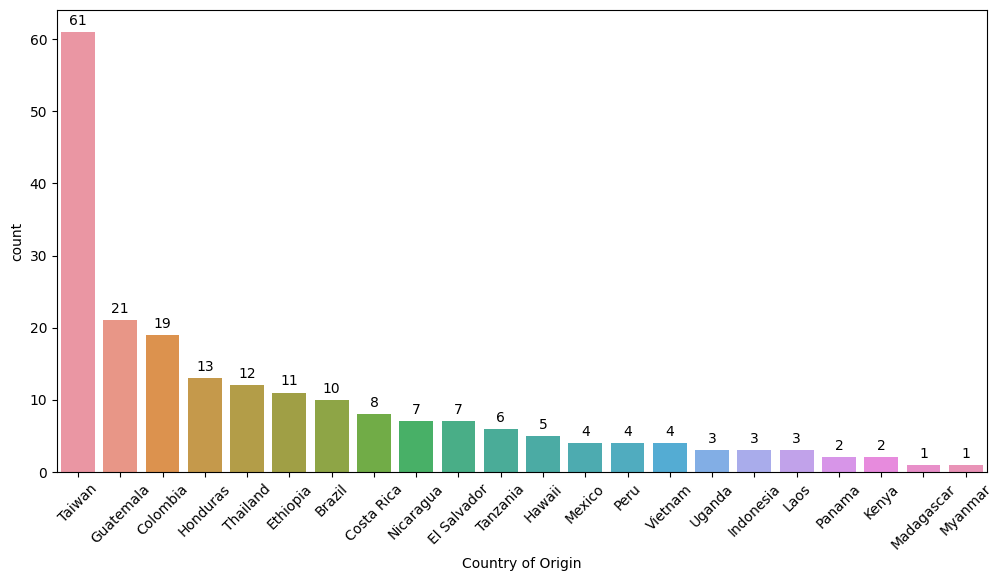

In [5]:
origin = df['Country of Origin'].value_counts()
plt.figure(figsize=(12,6))
ax = sns.countplot(x='Country of Origin', data=df, order=origin.index, dodge=False)
for bars_group in ax.containers:
    ax.bar_label(bars_group, padding=3, fontsize=10)
plt.xticks(rotation=45)
plt.show()

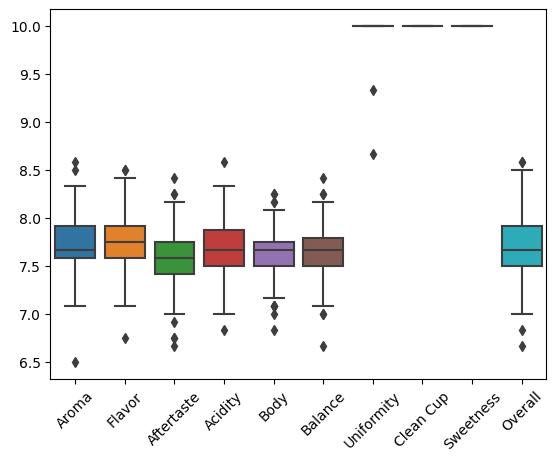

In [6]:
sns.boxplot(data=df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall',]])
plt.xticks(rotation=45)
plt.show()

Checar se a classe majoritária é facilmente identificável

In [7]:
df['isTaiwan'] = [country if country == 'Taiwan' else 'Other' for country in df['Country of Origin']]

In [8]:
feats = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall']

df['mean_feats'] = df[feats].sum(axis=1)



total cup points é a soma das outras colunas

In [9]:
df[['mean_feats','Total Cup Points']]

,mean_feats,Total Cup Points
0,89.33,89.33
1,87.59,87.58
2,87.42,87.42
3,87.17,87.17
4,87.08,87.08
...,...,...
202,80.10,80.08
203,80.00,80.00
204,79.66,79.67
205,78.08,78.08


In [10]:
print(df['Uniformity'].describe())
print(df['Clean Cup'].describe())
df['Sweetness'].describe()

count    207.000000
mean       9.990338
std        0.103306
min        8.670000
25%       10.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: Uniformity, dtype: float64
count    207.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
Name: Clean Cup, dtype: float64


count    207.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
Name: Sweetness, dtype: float64

Remover as feats que não têm variação de valor

In [11]:
feats = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall']

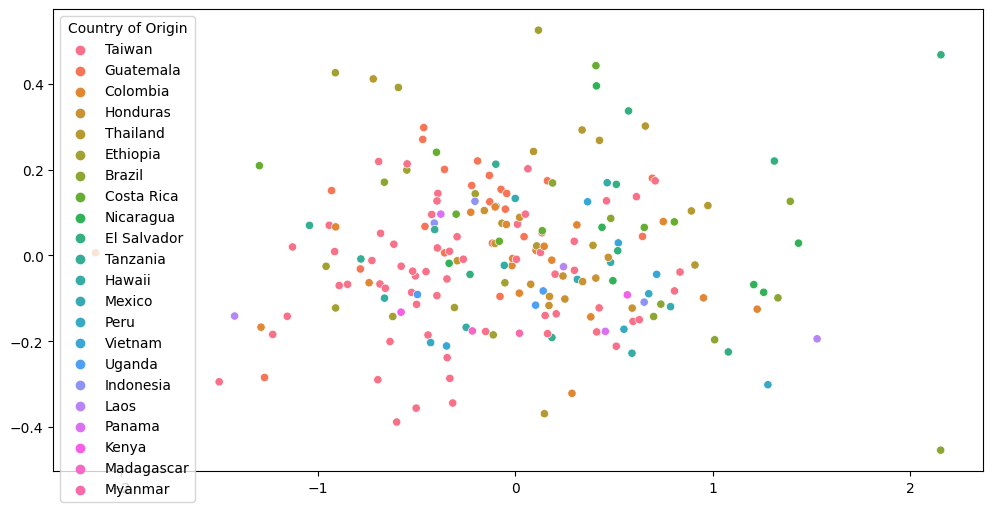

In [12]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df[feats])
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], hue=df['Country of Origin'], hue_order=origin.index)
plt.show()

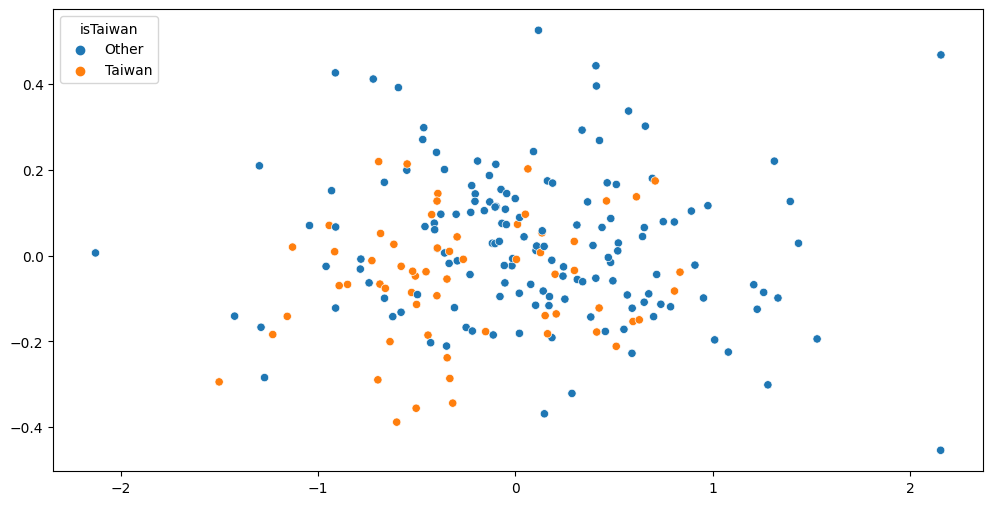

In [13]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df[feats])
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], hue=df['isTaiwan'])
plt.show()

/Users/felipepaula1/miniconda3/envs/uqa37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/felipepaula1/miniconda3/envs/uqa37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 207 samples in 0.001s...
[t-SNE] Computed neighbors for 207 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 207 / 207
[t-SNE] Mean sigma: 0.207256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.745140
[t-SNE] KL divergence after 1000 iterations: 0.369601


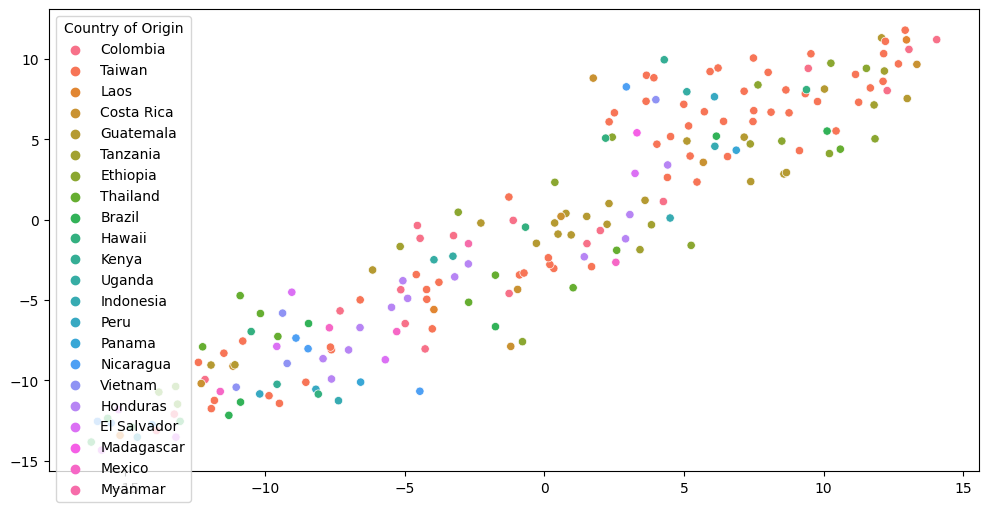

In [14]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_df = tsne.fit_transform(df[feats])
plt.figure(figsize=(12,6))
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], hue=df['Country of Origin'])
plt.show()

/Users/felipepaula1/miniconda3/envs/uqa37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/felipepaula1/miniconda3/envs/uqa37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 207 samples in 0.001s...
[t-SNE] Computed neighbors for 207 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 207 / 207
[t-SNE] Mean sigma: 0.207256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.745140
[t-SNE] KL divergence after 1000 iterations: 0.369601


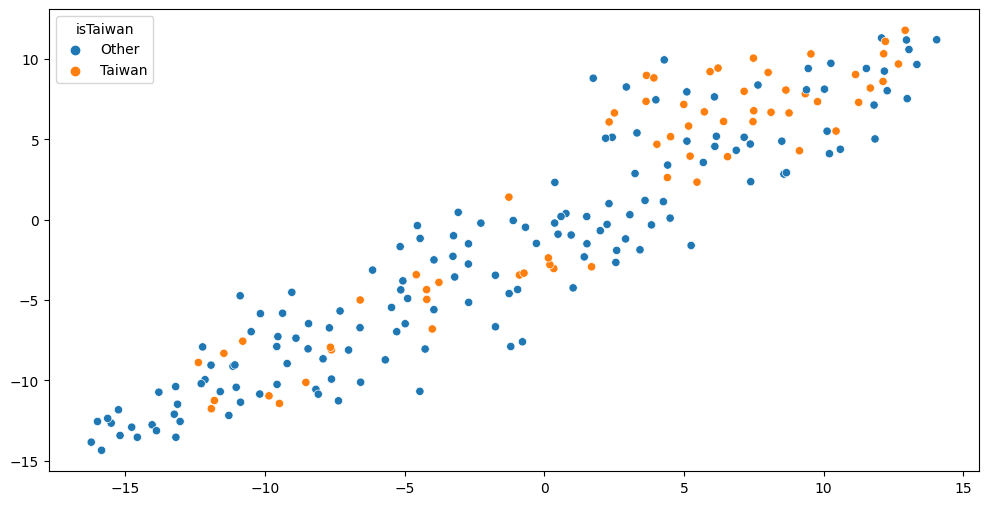

In [15]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_df = tsne.fit_transform(df[feats])
plt.figure(figsize=(12,6))
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], hue=df['isTaiwan'])
plt.show()

In [16]:
origin = df['Country of Origin'].value_counts()
def getmeanfeats(country):
    return df[df["Country of Origin"] == country][feats].mean()
# getmeanfeats('Taiwan').values
mean_feats = [getmeanfeats(country) for country in origin.index]
mean_feats = pd.DataFrame(mean_feats)
mean_feats['country'] = origin.index
mean_feats

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,country
0,7.842787,7.866721,7.712131,7.765246,7.661311,7.730984,7.806557,Taiwan
1,7.697619,7.880952,7.686667,7.758095,7.766190,7.726667,7.785714,Guatemala
2,7.780526,7.763684,7.618421,7.736842,7.653684,7.650526,7.674211,Colombia
3,7.706154,7.660000,7.536923,7.607692,7.607692,7.570769,7.590769,Honduras
4,7.466667,7.632500,7.526667,7.521667,7.603333,7.598333,7.479167,Thailand
5,7.864545,7.870909,7.757273,8.016364,7.819091,7.774545,7.862727,Ethiopia
6,7.475000,7.492000,7.359000,7.416000,7.426000,7.342000,7.375000,Brazil
7,7.592500,7.730000,7.532500,7.730000,7.708750,7.633750,7.813750,Costa Rica
8,7.475714,7.427143,7.240000,7.368571,7.500000,7.512857,7.370000,Nicaragua
9,7.332857,7.380000,7.261429,7.525714,7.475714,7.334286,7.227143,El Salvador


In [17]:
origin = df['Country of Origin'].value_counts()
def getmeanfeats(country):
    return df[df["Country of Origin"] == country][feats].std()
# getmeanfeats('Taiwan').values
std_feats = [getmeanfeats(country) for country in origin.index]
std_feats = pd.DataFrame(std_feats)
std_feats['country'] = origin.index
std_feats

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,country
0,0.266171,0.226434,0.216719,0.193474,0.197193,0.219110,0.242672,Taiwan
1,0.226824,0.195548,0.209077,0.161914,0.163752,0.197746,0.188668,Guatemala
2,0.328996,0.307882,0.309179,0.314802,0.299281,0.273262,0.335747,Colombia
3,0.063710,0.111729,0.155048,0.109556,0.093109,0.127375,0.110413,Honduras
4,0.240126,0.252807,0.163114,0.214087,0.188165,0.180949,0.267359,Thailand
5,0.214073,0.247283,0.221680,0.172700,0.189602,0.162565,0.134988,Ethiopia
6,0.227217,0.319576,0.362413,0.372027,0.335467,0.339143,0.384773,Brazil
7,0.249671,0.265975,0.296057,0.287899,0.231729,0.244303,0.417815,Costa Rica
8,0.225600,0.255716,0.303425,0.209716,0.245153,0.364450,0.307571,Nicaragua
9,0.438547,0.346362,0.330678,0.217475,0.318374,0.302316,0.276810,El Salvador


In [18]:
def processAltitude(entry):
    entry = str(entry)
    if "-" in entry:
        first, second = entry.split("-")
        new_value = (int(first) + int(second))/2
        return new_value
    elif "A" in entry:
        first, second = entry.split("A")
        new_value = (int(first) + int(second))/2
        return new_value
    elif "~" in entry:
        first, second = entry.split("~")
        new_value = (int(first) + int(second))/2
        return new_value      
    else:
        return float(entry)

#drop a unica linha com na
df = df.dropna(subset=['Altitude'])
df['new_altitude'] = [processAltitude(alt) for alt in df['Altitude']]

<AxesSubplot:xlabel='new_altitude', ylabel='Count'>

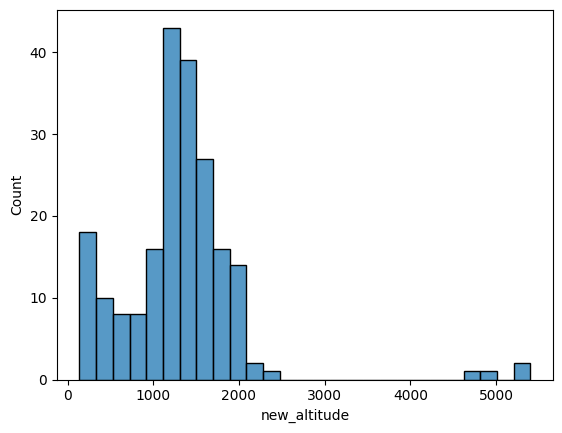

In [19]:
sns.histplot(data=df, x="new_altitude")

In [20]:
df[df['new_altitude']>4500]

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,isTaiwan,mean_feats,new_altitude
47,47,47,Guatemala,PEÑA BLANCA,11/951/279,BENEFICIO LAS AMERICAS,11/951/279,"OLAM AGRO GUATEMALA, S.A.",4700,Santa Rosa,...,0,green,4,"February 23rd, 2024",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,Other,85.00,4700.0
60,60,60,Guatemala,SAN RAFAEL URIAS VALDES,11/54876/03,ECO COFFEE,11/54876/03,"VALBROS, S. A.",4895,ANTIGUA GUATEMALA,...,3,yellow-green,2,"May 19th, 2023",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,Other,84.66,4895.0
99,99,99,Guatemala,SAN RAFAEL URIAS VALDES,AMNI-22-0905,"BENEFICIO SANTA RITA, S. A.",11/54876/01,Asociación Nacional del Cafe,4895 A 5650,ANTIGUA GUATEMALA,...,1,greenish,4,"May 19th, 2023",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,Other,83.84,5272.5
182,182,182,Vietnam,Gaia Farms,221221,Hulling Facility,NaN,Brew Baby Coffee Company,5400,Lam Dong Province,...,0,green,4,"April 9th, 2024",Firedancer Coffee Consultants,"165 Commerce Drive, Ste 103",Firedancer Coffee Consultants -,Other,81.84,5400.0


In [21]:
df['Processing Method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey', nan,
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

<AxesSubplot:xlabel='Moisture Percentage', ylabel='Count'>

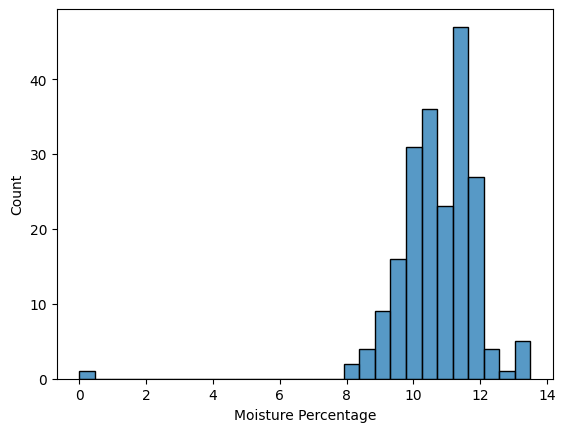

In [22]:
sns.histplot(data=df, x="Moisture Percentage")

<AxesSubplot:xlabel='Country of Origin', ylabel='Category One Defects'>

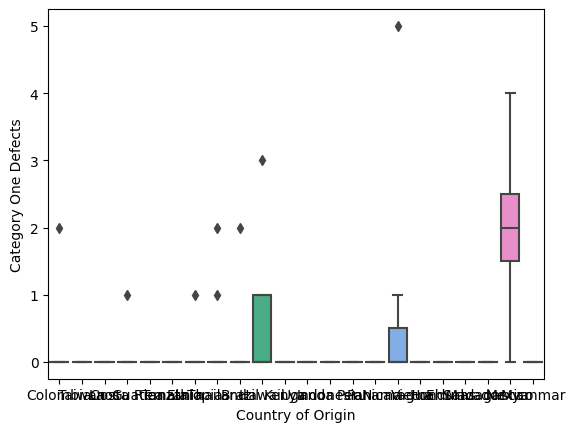

In [23]:
sns.boxplot(df, x='Country of Origin', y='Category One Defects')


In [24]:
df['Color'].value_counts()

green            101
greenish          35
bluish-green      21
blue-green        12
yellow-green      10
brownish           9
pale yellow        6
yellow green       5
yellowish          4
yellow- green      1
browish-green      1
yello-green        1
Name: Color, dtype: int64

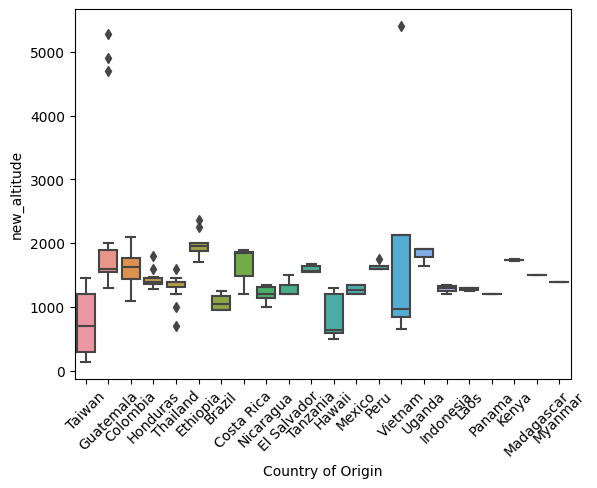

In [25]:
sns.boxplot(df, x="Country of Origin",y='new_altitude', order=origin.index )
plt.xticks(rotation=45)
plt.show()

In [26]:
country_continent = {
    "Taiwan": "Asia",
    "Guatemala": "America",
    "Colombia": "America",
    "Honduras": "America",
    "Thailand": "Asia",
    "Ethiopia": "Africa",
    "Brazil": "America",
    "Costa Rica": "America",
    "Nicaragua": "America",
    "El Salvador": "America",
    "Tanzania": "Africa",
    "Hawaii": "America", #Oceania
    "Mexico": "America",
    "Peru": "America", 
    "Vietnam": "Asia",
    "Uganda": "Africa",
    "Indonesia": "Asia",
    "Laos": "Asia",
    "Panama": "America",
    "Kenya": "Africa",
    "Madagascar": "Africa",
    "Myanmar": "Asia"
} 

df['continent'] = [country_continent[entry] for entry in df["Country of Origin"]]

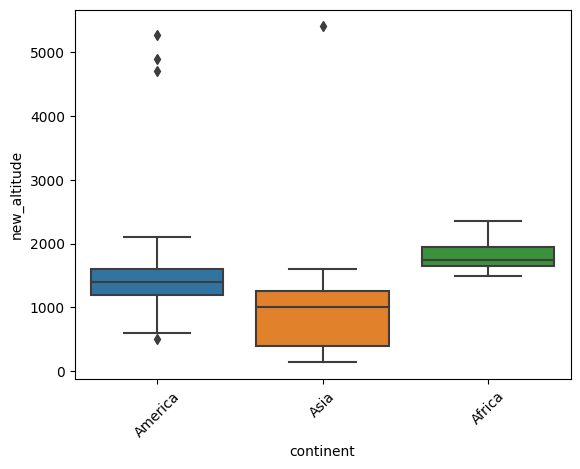

In [27]:
sns.boxplot(df, x="continent",y='new_altitude')
plt.xticks(rotation=45)
plt.show()

In [28]:
df['continent'].value_counts()

America    99
Asia       84
Africa     23
Name: continent, dtype: int64

In [29]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact',
       'isTaiwan', 'mean_feats', 'new_altitude', 'continent'],
      dtype='object')

In [30]:
df['Variety'].value_counts()

Caturra                                                         27
Gesha                                                           27
Typica                                                          23
Bourbon                                                         17
Catuai                                                          12
unknown                                                         12
Catimor                                                         11
Ethiopian Heirlooms                                              9
SL34                                                             8
Mundo Novo                                                       4
SL14                                                             3
Yellow Bourbon                                                   3
SHG                                                              3
Java                                                             3
Maragogype                                                    

In [31]:
df['Processing Method'].value_counts()

Washed / Wet                            124
Natural / Dry                            46
Pulped natural / honey                   25
Double Anaerobic Washed                   1
Semi Washed                               1
Honey,Mossto                              1
Double Carbonic Maceration / Natural      1
Wet Hulling                               1
Anaerobico 1000h                          1
SEMI-LAVADO                               1
Name: Processing Method, dtype: int64

<AxesSubplot:xlabel='Quakers', ylabel='Count'>

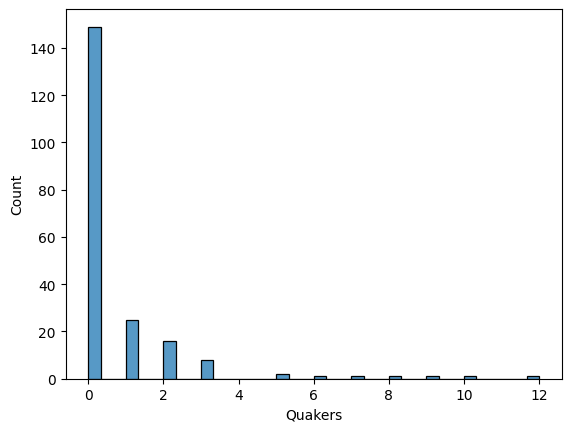

In [32]:
sns.histplot(df, x="Quakers")

In [34]:
df.to_csv("data/df_new_feats.csv")